# Introduction to scikit-learn(sklearn)

- This notebook explains the most useful functions of scikit-learn library.



### Let's listify the contents


In [1]:
#Here we will be covering:

what_we_were_covering=(
"0. An end-to-end Scikit-learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make prediction on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save adn load a trained model",
"7. Put it all together!")

In [2]:
what_we_were_covering

('0. An end-to-end Scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save adn load a trained model',
 '7. Put it all together!')

## 0. An end-to-end Scikit-learn workflow

### 1. Get the data ready

In [3]:
# fixing warrning issues

import warnings
warnings.filterwarnings("default")

In [4]:
# standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/akash/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# create x (feature matrix)

x = heart_disease.drop("target",axis=1) #removing target column

# create y (label)

y = heart_disease["target"] 

### 2.Choosing the right model and hyperparameters



In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we will keep the default hyperparameters
clf.get_params() # retrives the parameter of clf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3.Fit the model into the training data


In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
clf.fit(x_train,y_train);

In [10]:
clf.fit(x_train,y_train)

RandomForestClassifier()

#### 3.1 Make a prediction

In [11]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2


In [12]:
# y_label = clf.predict(np.array([0,2,3,4])) // error

In [13]:
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

### 4.Evaluating the model on training data and test data

In [14]:
# on training data

clf.score(x_train,y_train)

1.0

In [15]:
# on test_data

clf.score(x_test,y_test)

0.8688524590163934

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        31
           1       0.79      1.00      0.88        30

    accuracy                           0.87        61
   macro avg       0.89      0.87      0.87        61
weighted avg       0.90      0.87      0.87        61



In [17]:
confusion_matrix(y_test,y_preds)

array([[23,  8],
       [ 0, 30]])

In [18]:
accuracy_score(y_test,y_preds)

0.8688524590163934

### 5.Improve a model


In [19]:
## Try different amount of n_estimators 
np.random.seed()
for i in range(10,100,10):
    print(f"Trying model with {i} estimators.")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score (x_test,y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators.
Model accuracy on test set: 78.69%

Trying model with 20 estimators.
Model accuracy on test set: 80.33%

Trying model with 30 estimators.
Model accuracy on test set: 85.25%

Trying model with 40 estimators.
Model accuracy on test set: 86.89%

Trying model with 50 estimators.
Model accuracy on test set: 88.52%

Trying model with 60 estimators.
Model accuracy on test set: 88.52%

Trying model with 70 estimators.
Model accuracy on test set: 90.16%

Trying model with 80 estimators.
Model accuracy on test set: 85.25%

Trying model with 90 estimators.
Model accuracy on test set: 85.25%



### 6. Save a model and load it

In [20]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

/tmp/ipykernel_4053/845767007.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  pickle.dump(clf, open("random_forest_model_1.pkl","wb"))


In [21]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

/tmp/ipykernel_4053/3236450343.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))


0.8524590163934426

# 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels(usually `x` and `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values ( also called feature encoding)

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
x = heart_disease.drop("target",axis=1) # axis =1 (row),axis=0(column)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Split the data into training and test sets


In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
x.shape

(303, 13)

In [28]:
len(heart_disease)

303

In [29]:
x.shape[0]*0.8

242.4

In [30]:
242+61

303

In [31]:
what_we_were_covering

('0. An end-to-end Scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save adn load a trained model',
 '7. Put it all together!')

## 1.1 Make sure the data is in numerical

In [32]:
url = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv"
car_sales = pd.read_csv(url)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [34]:
len (car_sales)

1000

In [35]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [36]:
# Splitting into x and y

x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# Splitting into train and test test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


### Building a machine learning model

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#model.fit(x_train,y_train)
#model.score(x_test,y_test) // Errors since make and colour is not numerical

In [38]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


#### Turning categories into numbers

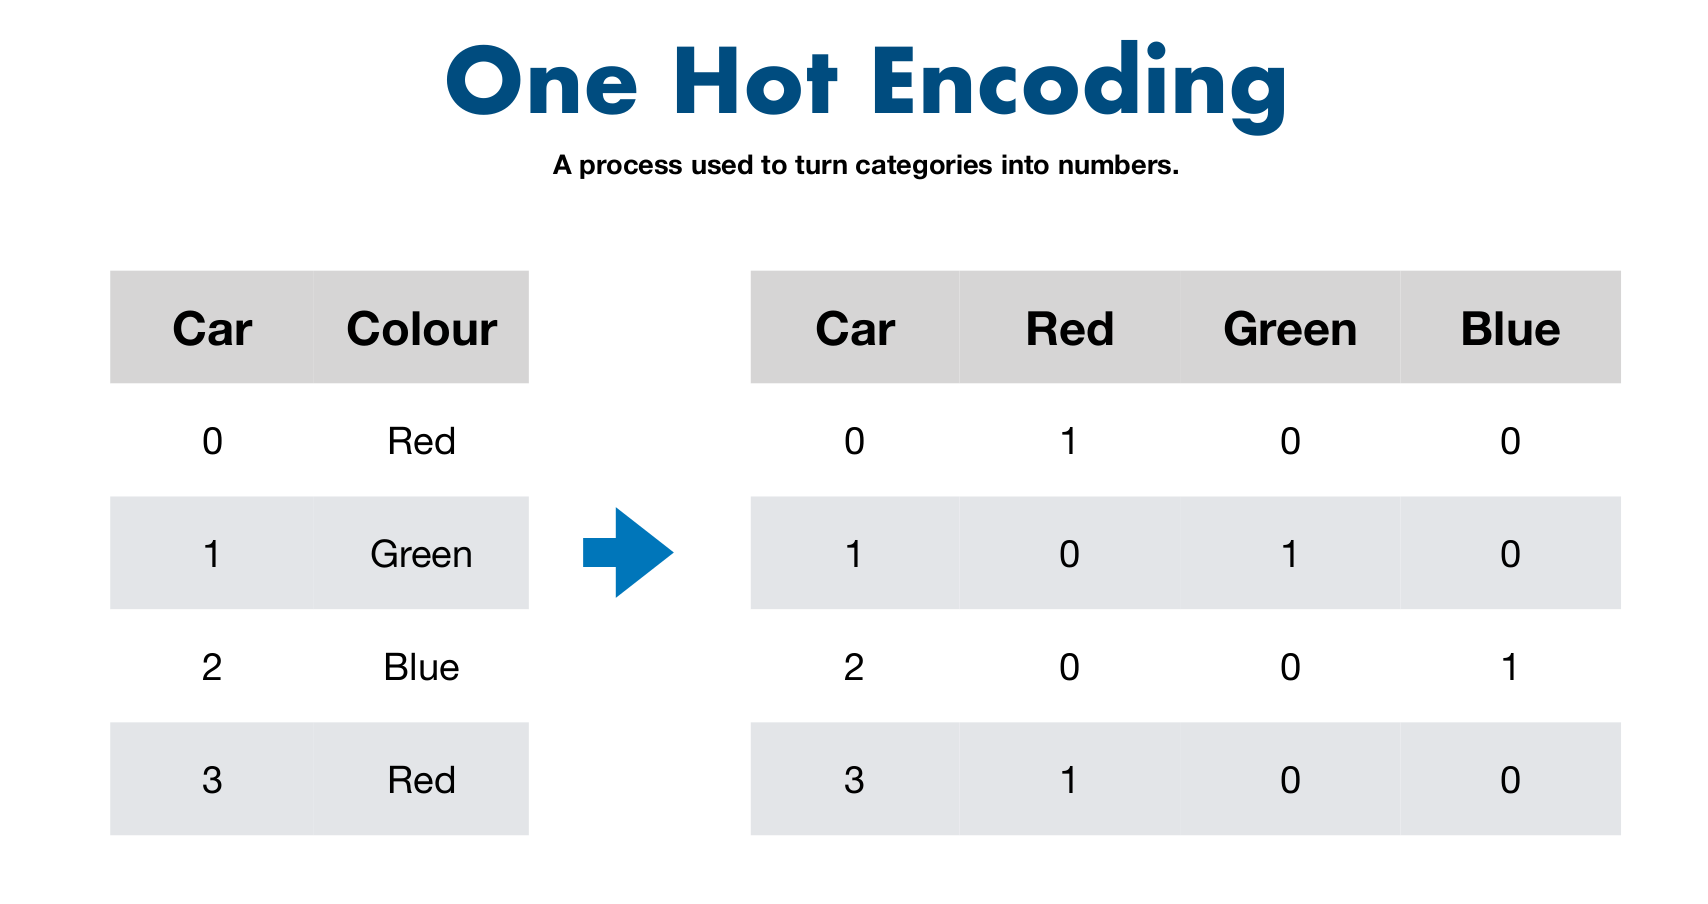

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] # Making Doors as categorical features since door is int type
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [40]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [41]:
# Converting the tranformed_x to df

pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [42]:
# doing it in another way with  pd.get_dummies 

dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies


,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [43]:
### Let's refit the model

x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

model.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [45]:
model.score(x_test,y_test)

0.18580872557729822

## 1.2 What if there were missing values?

    1. Fill them with some value (also known as imputation).
    2. Remove the samples with the missing data altogether.

In [46]:
# import car slaes missing data 

car_sales_missing = pd.read_csv(url)
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [47]:
# checking missing no.of.missing values
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [48]:
# create x and y

x = car_sales_missing.drop("Price",axis=1)
y = car_sales["Price"]

In [49]:
# converting data into numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

`OneHotEncoder can handle missing values/Nan values`

In [50]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [51]:
car_sales_missing["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [52]:
### Option 1: Filling missing data with pandas

#Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" Column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Doors" Column
car_sales_missing["Doors"].fillna(4,inplace=True)

#Fill the "Odometer (KM) Column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)




In [53]:
#checking the datframe again

car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [54]:
# Removing rows with missing Price value

car_sales_missing.dropna(inplace=True)

In [55]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [56]:
len(car_sales_missing)

1000

In [57]:
x = car_sales_missing.drop("Price",axis=1)
y= car_sales["Price"]

In [58]:
# converting data into numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

`The above step is optional,since the older version does'nt support the Nan/missing_values in OneHotencoder`

Read: https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/lecture/26394916#overview

### Option 2: Filling Missing data and transforming categorical data with Scikit-learn

The main takeaways:
- Split the data 
- Fill/transform the training set and test set separately

In [59]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [60]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [61]:
# Drop the rows with no labels

car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [62]:
# Split the data ointo x and y

x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

# split data into train and test 

np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [63]:
# checking the missing values

x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [64]:
# Fill the missing values with scikit-learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with mean
# impute = filling

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns

cat_features= ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]


# Create an imputer (something that fills missing data)

imputer = ColumnTransformer([
    ("cat_transformer", cat_imputer , cat_features),
    ("door_imputer", door_imputer ,door_features),
    ("num_imputer", num_imputer ,num_features)
    ])

# fill train and test value separately 

filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.transform(x_test)

# check the filled x_train

filled_x_train


array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [65]:
# Get our transformed data array's back into dataframe

car_sales_filled_train = pd.DataFrame(filled_x_train,
                                      columns=["Make","Colour","Doors","Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_x_test,
                                     columns=["Make","Colour","Doors","Odometer (KM)"])

# check missing data in training set

car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [66]:
# check to see the original.. still the missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [67]:
# converting to non-numerical to numerical

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder = "passthrough")

# fill train and test values separately

transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test  = transformer.transform(car_sales_filled_test)

# check transformed and filled x_train

transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [68]:
# now we have transformed x , let's see if we can fit a the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and and one-hot encoded x data)

model.fit(transformed_x_train,y_train)
model.score(transformed_x_test,y_test)

0.21229043336119102

In [69]:
# check length of transformed data (filled and one-hot encoder) vs length of original data

len(transformed_x_train.toarray()) + len(transformed_x_test.toarray()), len(car_sales)

(950, 1000)

**Note:** The 50 less values in the transformed data is missing because we dropped the rows (50 total) with missing values in the price column.

# 2. Choosing the right estimator/algorithm for your problem 

Notes:

- sklearn refers to machine learning model,algorithms as estimators
- Classifcation problem - Predicting a category (heart disease or not)
    - Sometimes you'll see `clf`(short for classification) used as classification estimator
- Regression problem - predicting a number (selling price of car)

if you're working on machine learning model and looking to use sklearn and note sure what model should you use,
refer to the sklearn machine learning map:https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [70]:
# Get california dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [71]:
# coverting thge dataset into dataframe

housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
# import algorithm/estimator

from sklearn.linear_model import Ridge


# setup random seed

np.random.seed(42)

# create the data

x = housing_df.drop("target",axis=1)
y = housing_df["target"] 

# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train,y_train)

#check the score of the model (on the test set)
model.score(x_test,y_test)

0.5758549611440126

### Trying with ensemble algorithm

In [74]:
# import algorithm/estimator

from sklearn.ensemble import GradientBoostingRegressor


# setup random seed

np.random.seed(42)

# create the data

x = housing_df.drop("target",axis=1)
y = housing_df["target"] 

# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

#check the score of the model (on the test set)
model.score(x_test,y_test)

0.7755824521517651

In [75]:
# import algorithm/estimator

from sklearn.ensemble import RandomForestRegressor


# setup random seed

np.random.seed(42)

# create the data

x = housing_df.drop("target",axis=1)
y = housing_df["target"] 

# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(x_train,y_train)

#check the score of the model (on the test set)
model.score(x_test,y_test)

0.8066196804802649

## 2.1 Picking a machine learning model for classification problem

scikit-learn map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [76]:
# get the data

heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
len(heart_disease)

303

Based on the sklearn map condition,it says `Linearsvc`

In [78]:
# import linearsvc estimators/algorithm class

from sklearn.svm import LinearSVC

# set random seed

np.random.seed(42)

# Make the data

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate LinearSVC

clf = LinearSVC(max_iter=10000)
clf.fit(x_train,y_train)

# Evaluate LinearSVC
clf.score(x_test,y_test)

/home/akash/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/akash/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [79]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [80]:
# import Randomforestclassifer estimators/algorithm class

from sklearn.ensemble import RandomForestClassifier

# set random seed

np.random.seed(42)

# Make the data

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate Randomclassifier

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate Randomclassifier
clf.score(x_test,y_test)

0.8524590163934426

 ### Tidbit:

1. If you have structured data, use ensemble methods.
2. If you unstructured data, use deep learning or transfer learning.

# 3.Fit the model/Algorithm on our data and use it to make predictions

## 3.1 Fitting the model into data
 Different names for:
- `x` = features,features variables,data
- `y` = labels,targets,targets variables

In [81]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
# import Randomforestclassifer estimators/algorithm class

from sklearn.ensemble import RandomForestClassifier

# set random seed

np.random.seed(42)

# Make the data

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate Randomclassifier

clf = RandomForestClassifier()

# Fit the model to the data (training the machine leanring model)
clf.fit(x_train,y_train)

# Evaluate Random forest classifier (use the patterns the model has learned)
clf.score(x_test,y_test)

0.8524590163934426

In [83]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [84]:
x.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using.

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

# 3.2 Making prediction using machine learning models

2 ways of make predictions
1. `predict()`
2. `predict_proba()`

In [85]:
# use the trained model to make predictions

# clf.predict(np.array([1,2,3,4,5,6])) # this does'nt work

In [86]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [87]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [88]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [89]:
# compare the predictions to truth labels to evaluate the model

y_preds = clf.predict(x_test)
np.mean (y_preds == y_test)

0.8524590163934426

In [90]:
clf.score(x_test,y_test)

0.8524590163934426

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()` - use this if someone asks you "what's the probability of your model is assigning to each prediction?"

In [92]:
# predict_proba() returns probabilities of a classification label

clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [93]:
# let's predict on the same data...
clf.predict(x_test[:5]) # it takes values [0.11,0.51,0.57,0.16,0.82]

array([0, 1, 1, 0, 1])

In [94]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [95]:
 heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict` can also be used for regression models

In [96]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [97]:
from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)


#create a data

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# split into train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# create a model instance

model = RandomForestRegressor()

# fit the modelto the data

model.fit(x_train,y_train)

# make predictions

y_preds = model.predict(x_test)

In [98]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [99]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [100]:
# compare the predictions to the truth 

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)


0.3265721842781009

In [101]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

Read through: https://scikit-learn.org/stable/modules/model_evaluation.html

# 4. Evaluating a machine learning model

Three ways to evaluate scikit-learn models/estimators:

1. Estimator's built-in `score()` method.
2. The `scoring` parameter.
3. Problem specific metric functions.

Read:https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating model using `score` method

In [102]:
# import algorithm

from sklearn.ensemble import RandomForestClassifier

# setup random seed

np.random.seed(42)

# separate the data into x and y labels

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# split the data into train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate the modek

model =RandomForestClassifier()

# fit the model
model.fit(x_train,y_train)

RandomForestClassifier()

In [103]:
# score of the model (test_set)

model.score(x_test,y_test)

0.8524590163934426

In [104]:
# score for the train set model

model.score(x_train,y_train)

1.0

let us use `score()` on the regression problem...

In [105]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data 
    
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# split the data into train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate the model

model = RandomForestRegressor()

# fit the model
model.fit(x_train,y_train)

RandomForestRegressor()

In [106]:
# score for the model (train_set)

model.score(x_train,y_train)

0.9736828565983116

In [107]:
# score for the model (test_set)

model.score(x_test,y_test)

0.8066196804802649

In [108]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)


RandomForestClassifier()

In [109]:
# The default score() evaluation metric is is r_squared for regression algorithms
# Highest  =1.0 lowest =0.0 
model.score(x_test,y_test)

0.8524590163934426

### 4.2 Evaluating a model using the `scoring` parameter

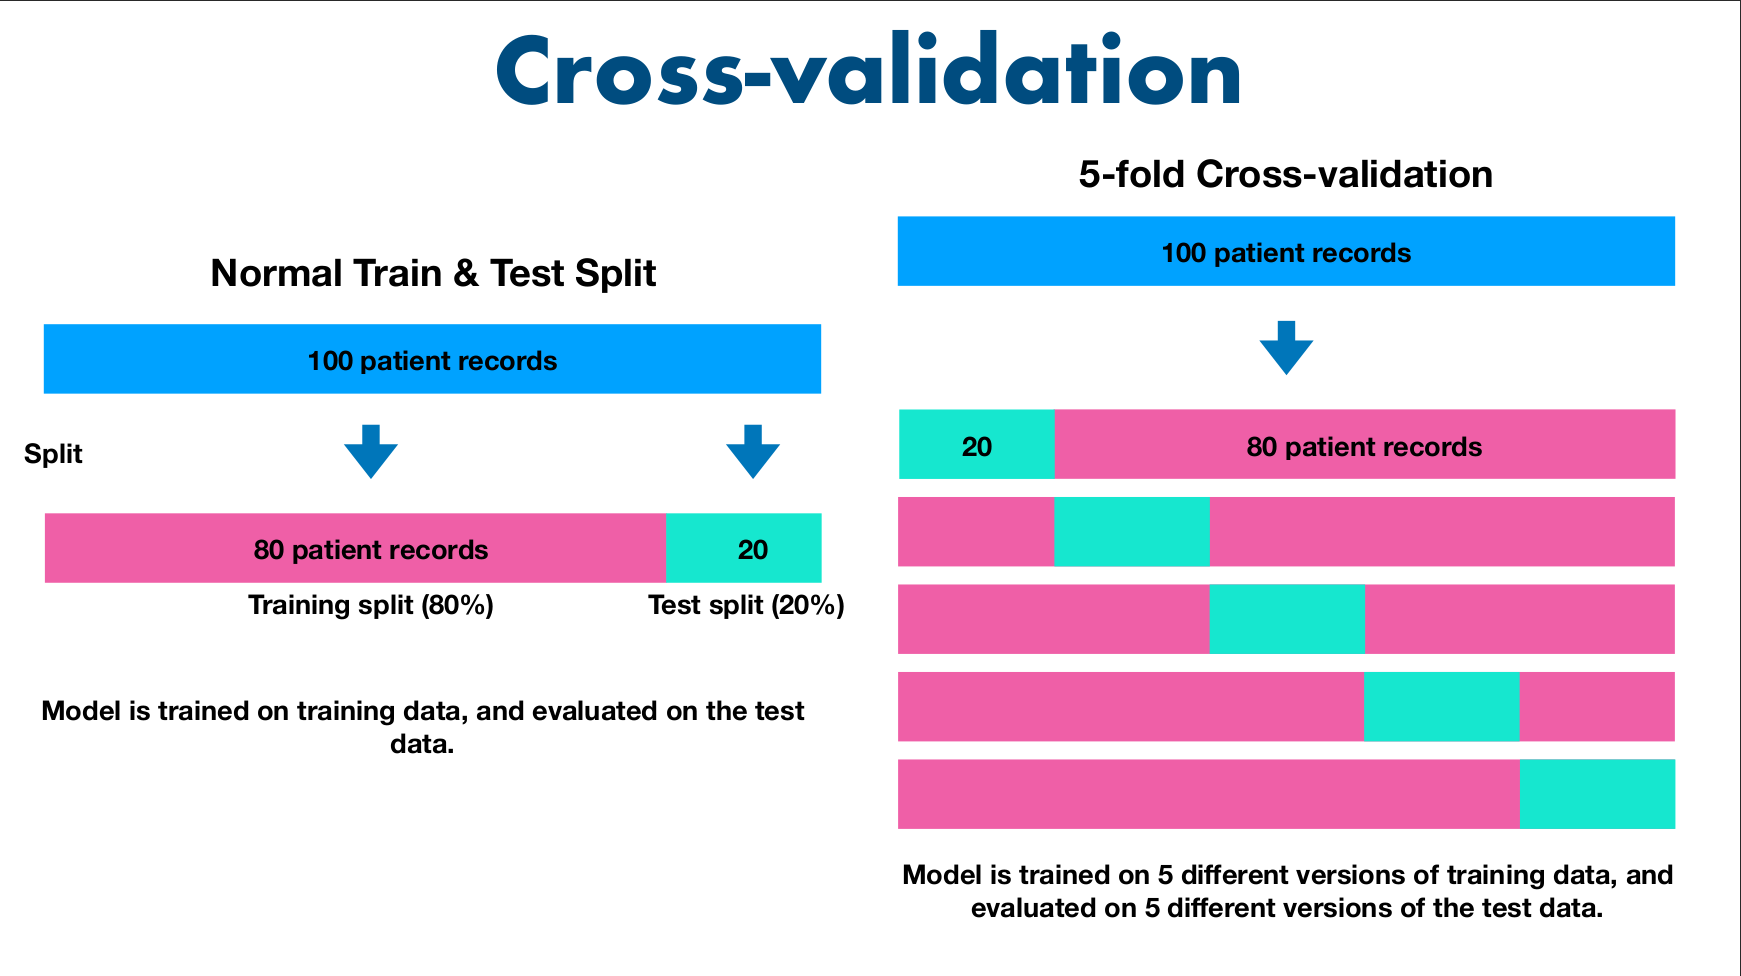

In [110]:


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)


RandomForestClassifier()

In [111]:
clf.score(x_test,y_test)

0.8524590163934426

In [112]:
cross_val_score(clf,x,y) # cv= none by default

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [113]:
cross_val_score(clf,x,y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [114]:
cross_val_score(clf,x,y, cv=6)

array([0.8627451 , 0.8627451 , 0.90196078, 0.76      , 0.8       ,
       0.74      ])

In [115]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(x_test,y_test)

# Take the mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

# compare the two 
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [116]:
# default scoring parameter of classifier = mean accuracy
clf.score(x_test,y_test)

0.8524590163934426

In [117]:
# scoring parameter set to None by default

cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrices

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report


**Accuracy**

In [118]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,x,y,cv=5 )

In [120]:
np.mean(cross_val_score)

0.8248087431693989

In [121]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

- Area under curve(AUC)
- ROC curve

Roc curves are a comparison of model's true positive rate(tpr) and false positive rate(fpr).
- True positive = model predicts 1 when truth is 1
- False Positive  = model predicts 1 when truth is 0
- True Negative = model predicts 0 when truth is 0
- False Negative = model predicts 0 when truth is 1

# create train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [123]:
from sklearn.metrics import roc_curve

# fit the classifier 
clf.fit(x_train,y_train)

# Make predictions with probalities
y_probs = clf.predict_proba(x_test)
y_probs[:10],len(y_probs)

(array([[0.87, 0.13],
        [0.41, 0.59],
        [0.45, 0.55],
        [0.89, 0.11],
        [0.19, 0.81],
        [0.14, 0.86],
        [0.4 , 0.6 ],
        [0.96, 0.04],
        [1.  , 0.  ],
        [0.43, 0.57]]),
 61)

In [124]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [125]:
# calculate fpr,tpr and thresholds

fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

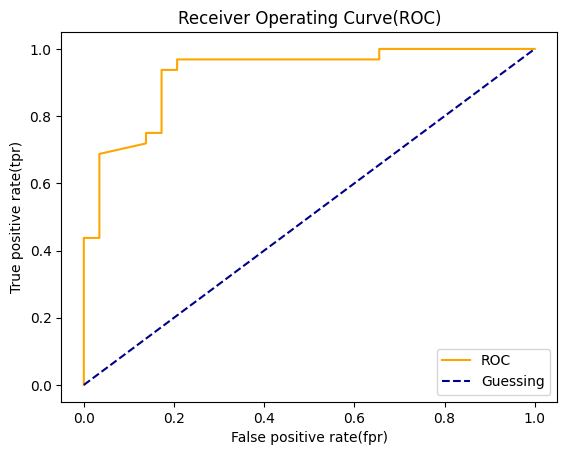

In [126]:
# creating a function for plotting ROC curve

import matplotlib.pyplot as plt


def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and
    true positive rate(tpr) of a model.
    """
    
    # plot a roc curve
    fig,ax = plt.subplots();
    
    ax.plot( fpr,tpr,color="orange",label="ROC"  )
    
    # plot the line with no predictive power (baseline)
    ax.plot([0,1],[0,1],color ="darkblue",linestyle="--",label="Guessing")
    
    # cutomize the plot 
    ax.set(title="Receiver Operating Curve(ROC)",
           xlabel="False positive rate(fpr)",
           ylabel="True positive rate(tpr)")
    ax.legend()
    
    
plot_roc_curve(fpr,tpr)

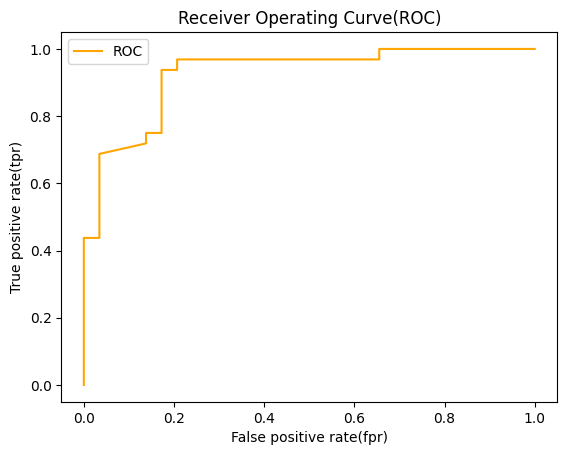

In [127]:
# creating a function for plotting ROC curve

import matplotlib.pyplot as plt


def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and
    true positive rate(tpr) of a model.
    """
    
    # plot a roc curve
    fig,ax = plt.subplots();
    
    ax.plot( fpr,tpr,color="orange",label="ROC"  )
    
    # plot the line with no predictive power (baseline)
   # ax.plot([0,1],[0,1],color ="darkblue",linestyle="--",label="Guessing")
    
    # cutomize the plot 
    ax.set(title="Receiver Operating Curve(ROC)",
           xlabel="False positive rate(fpr)",
           ylabel="True positive rate(tpr)")
    ax.legend()
    
    
plot_roc_curve(fpr,tpr)

In [128]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9251077586206896

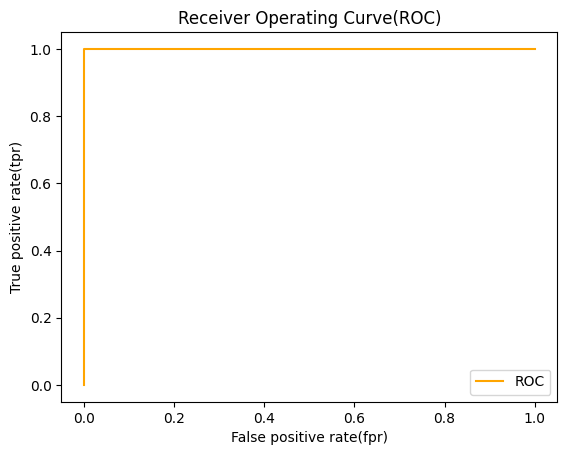

In [129]:
# plot the perfect ROC curve and AUC curve

fpr,tpr,thresholds = roc_curve(y_test,  y_test)
plot_roc_curve(fpr,tpr)

In [130]:
# perfect auc score
roc_auc_score(y_test,y_test)

1.0

- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
- https://www.youtube.com/watch?v=4jRBRDbJemM

### Confustion Matrix

The next way to evaluate a classification model is by using a [confuson matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

- A confusion matrix is a quick way to compare the labels a model predicts and actual labels it was supposed to predict. 
- In essence,giving you an idea of where the model is getting confused.

In [131]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)


array([[24,  5],
       [ 4, 28]])

In [132]:
# To visuvalize use pd.crosstab()

pd.crosstab(
    y_test,
    y_preds,
    rownames=["Actual label"],
    colnames=["Predicted Label"]
)

Predicted Label,0,1
Actual label,,
0,24,5
1,4,28


In [133]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.16.0-unknown has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that the

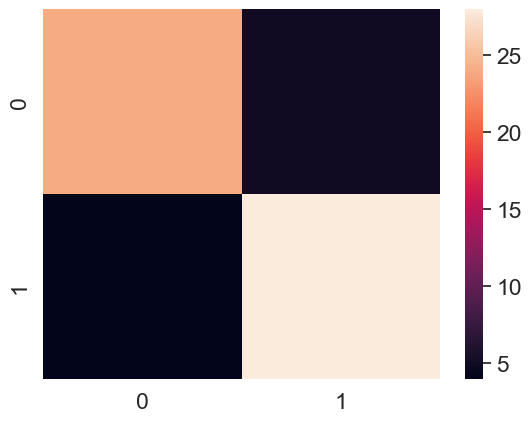

In [134]:
import seaborn as sns

# set font scale

sns.set(font_scale=1.5)

# create a confusion matrix

conf_mat = confusion_matrix(y_test,y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);
       


In [135]:
import sklearn
sklearn.__version__

'1.4.0'

#### Creating a confusion matrix using Scikit-learn

scikit-learn has multiple different implementations of plotting confusion matrices:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

In [136]:
sns.reset_orig() #resetting it for removal of white lines in grids.

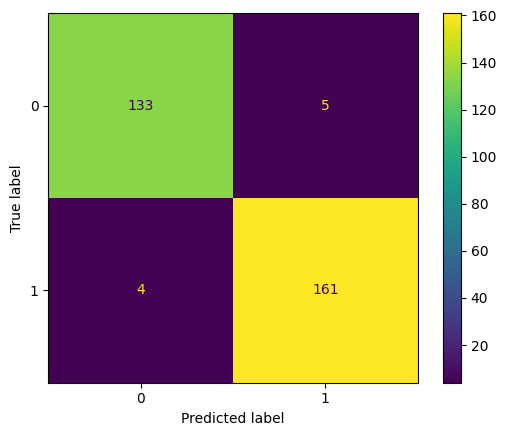

In [137]:
#Confusion matrics from estimators

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y);

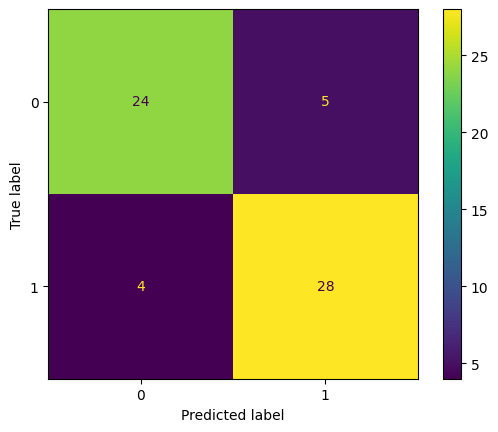

In [138]:
# Confusion metrics from predictions

ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds);


#### Classification report


In [139]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



[Scikit-learn-notes](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/slides/lesson-2.4.1-what-is-scikit-learn-keynote.pdf)


In [140]:
# where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report( disease_true,
                                    disease_preds,
                                    output_dict=True,
                                    zero_division=0))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


#### Summary

* **Accuracy** is a good measure to start if all classes are balanced.
* **Precision** and **Recall** become more important when classes are imbalanced.
* If false positive predictions  are worse than false negatives,aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1 score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentations - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

we will cover:

1. R^2 or coefficient of determination.
2. Mean Absolute error(MAE).
3. Mean square error(MSE).

**What does R^2 does?**

- R^2 is an measure that represents the goodness of the regression model.
- The values of R-square lies between lies between 0 to 1.
- when R^2 =1, model prefectly fits the data and no difference between predicted value and actual value.
- When R^2 = 0, model does not predict any variability in the model.

In [141]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed (42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [142]:
model.score(x_test,y_test)

0.8066196804802649

In [143]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [144]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [145]:
y_test.mean()

2.0550030959302323

In [146]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [147]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [148]:
r2_score(y_true =y_test,
         y_pred=y_test_mean)

0.0

In [149]:
r2_score(y_true = y_test,
         y_pred = y_test)

1.0

### Mean Absolute Error(MAE)

MAE is the average of absolute differences between predictions and actual values.

It basically give an idea how wrong your model predictions are.

In [150]:
# MAE

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.3265721842781009

In [151]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240


In [152]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3265721842781009

**Mean Square Error**

- Measures the mean square difference between predicted and actual values.

In [153]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534073069137548

In [154]:
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240


In [155]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [156]:
# calculate the mse by manually

squared = np.square(df["differences"])
squared.mean()

0.2534073069137548

In [157]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 # increase the "sqaured_differences sample for 1 sample

In [158]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [159]:
# calculate mse with large error
df_large_error["squared_differences"].mean()

0.25728320720794084

In [160]:
# artificially increase error in "square_differences" column for 100 samples
df_large_error.iloc[1:100,3] = 20
df_large_error.head(100)

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.0
3024,0.45800,0.754940,0.296940,20.0
15663,5.00001,4.928596,-0.071414,20.0
20484,2.18600,2.540290,0.354290,20.0
9814,2.78000,2.331760,-0.448240,20.0
...,...,...,...,...
6052,1.15800,1.344520,0.186520,20.0
15975,2.78600,3.715552,0.929552,20.0
14331,2.50000,1.697340,-0.802660,20.0
1606,0.85000,1.421570,0.571570,20.0


In [161]:
# calculate MSE with large errors
df_large_error["squared_differences"].mean()

0.7333540351264799

### 4.2.3 Finally using the `scoring` parameter

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [163]:
np.random.seed(42)

cv_acc = cross_val_score(clf,x,y,cv=5) # when scoring is not defined it's none by default
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [164]:
# cross validated accuracy

print(f"The cross validated accuracy is: {np.mean(cv_acc)*100 :.2f}%")

The cross validated accuracy is: 82.48%


In [165]:
# precision 

np.random.seed(42)
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [166]:
# cross-validated precision 

print(f"The cross validated precision is: {np.mean(cv_precision)}")

The cross validated precision is: 0.8329547346025924


In [167]:
# recall

np.random.seed(42)
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [168]:
# cross-validated recall

print(f"The cross validated recall is: {np.mean(cv_recall)}") 

The cross validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being using for a regression problem..

In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x =housing_df.drop("target",axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [170]:
# when score is none # take bit long time

np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=3,scoring=None)
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [171]:
np.mean(cv_r2)

0.6545756342466266

In [172]:
# mean squared error


cv_mse = cross_val_score(model,x,y,cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)


-0.4302688111843372

In [173]:
cv_mse

array([-0.52532899, -0.34772023, -0.37442475, -0.43896032, -0.46490977])

In [174]:
# mean absolute error

cv_mae = cross_val_score(model,x,y,scoring="neg_mean_absolute_error")
np.mean(cv_mae)



-0.46681015659399233

In [175]:
cv_mae

array([-0.54518527, -0.41051585, -0.43822943, -0.46672399, -0.47339624])

## 4.3 Using Different Evaluation metrics as Scikit-Learn functions-

- The third way to evaluate scikit-learn machine learning model/estimators is to using the `sklearn.metrics` module -https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [183]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x and y
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# create model
clf = RandomForestClassifier()

# fit the model
clf.fit(x_train,y_train)


# make predictions
y_preds = clf.predict(x_test)

# Evaluating model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_preds)}")
print(f"Recall:{recall_score(y_test,y_preds)}")
print(f"F1_score:{f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy:85.25%
Precision:0.8484848484848485
Recall:0.875
F1_score:0.8615384615384616


**For regression problem**

In [187]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x and y
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# create model
model = RandomForestRegressor()

# fit the model
model.fit(x_train,y_train)


# make predictions
y_preds = model.predict(x_test)

# Evaluating model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score:{r2_score(y_test,y_preds)}")
print(f"MAE:{mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")

Regression metrics on the test set
R2 score:0.8066196804802649
MAE:0.3265721842781009
MSE:0.2534073069137548


In [188]:
what_we_were_covering

('0. An end-to-end Scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save adn load a trained model',
 '7. Put it all together!')

## 5.Improving a model

First predictions = baseline predictions.
First model = baseline model.

**From data perspective:**
- Could we collect more data?(generally,the more data,the better)
- Could we improve our data?

**From a model prespective:**
 - Is there is a better model we could use?
 - Could we improve the current model?

**Hyperparameters vs Parameters**
- Parameters = model finds these patterns in data
- Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

**Three ways to adjust hyperparameters:**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [189]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()


In [190]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}